In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px

In [3]:
# Replace 'your_dataset.csv' with the correct path to your dataset
df = pd.read_csv('/content/drive/MyDrive/Collab Dataset/titled_players_otb/titled_players_otb.csv')


In [4]:
df.head()

,fideid,name,country,sex,title,w_title,o_title,foa_title,standart_rating,rapid_rating,...,WIM,WIM_year,FM,FM_year,CM,CM_year,WGM,WGM_year,WH,WH_year
0,1701991,"Aaberg, Anton",SWE,M,IM,NaN,NaN,NaN,2322,2331,...,False,0,False,0,False,0,False,0,False,0
1,1407589,"Aabling-Thomsen, Jakob",DEN,M,IM,NaN,NaN,NaN,2327,0,...,False,0,True,2009,False,0,False,0,False,0
2,25678191,Aaditya Dhingra,IND,M,IM,NaN,NaN,NaN,2421,2208,...,False,0,False,0,True,2020,False,0,False,0
3,25778293,Aadya Gupta,IND,F,WFM,WFM,NaN,NaN,1968,1748,...,False,0,False,0,False,0,False,0,False,0
4,25991426,Aadya Ranganath,IND,F,WCM,WCM,NaN,NaN,1900,1704,...,False,0,False,0,False,0,False,0,False,0


In [5]:
df.isnull().sum()


,0
fideid,0
name,0
country,0
sex,0
title,0
w_title,17889
o_title,21423
foa_title,22551
standart_rating,0
rapid_rating,0


In [6]:
df.describe()

,fideid,standart_rating,rapid_rating,blitz_rating,birthday,IM_year,WFM_year,WCM_year,GM_year,WIM_year,FM_year,CM_year,WGM_year,WH_year
count,2.255700e+04,22557.000000,22557.000000,22557.000000,22426.000000,22557.000000,22557.000000,22557.000000,22557.000000,22557.000000,22557.000000,22557.000000,22557.000000,22557.0
mean,8.086377e+06,2192.399300,1480.992552,1495.377266,1980.879738,507.593563,191.403999,136.634393,164.071064,114.572771,707.866383,324.966441,46.249767,0.0
std,1.674088e+07,234.323372,1022.979256,1012.578134,18.211448,871.417904,590.463472,506.895963,549.585198,465.411333,961.199479,741.692178,301.092638,0.0
min,1.000130e+05,0.000000,0.000000,0.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.001470e+06,2087.000000,0.000000,0.000000,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,4.197755e+06,2226.000000,2055.000000,2049.000000,1982.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.250125e+07,2327.000000,2246.000000,2243.000000,1996.000000,1971.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,0.000000,0.0
max,6.520589e+08,2831.000000,2819.000000,2889.000000,2016.000000,2025.000000,2025.000000,2025.000000,2024.000000,2025.000000,2025.000000,2025.000000,2024.000000,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22557 entries, 0 to 22556
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fideid           22557 non-null  int64  
 1   name             22557 non-null  object 
 2   country          22557 non-null  object 
 3   sex              22557 non-null  object 
 4   title            22557 non-null  object 
 5   w_title          4668 non-null   object 
 6   o_title          1134 non-null   object 
 7   foa_title        6 non-null      object 
 8   standart_rating  22557 non-null  int64  
 9   rapid_rating     22557 non-null  int64  
 10  blitz_rating     22557 non-null  int64  
 11  birthday         22426 non-null  float64
 12  flag             12438 non-null  object 
 13  IM               22557 non-null  bool   
 14  IM_year          22557 non-null  int64  
 15  WFM              22557 non-null  bool   
 16  WFM_year         22557 non-null  int64  
 17  WCM         

In [10]:
fig = px.scatter(df, x='fideid', y='standart_rating', color='title', title="Dynamic Scatter Plot")
fig.show()

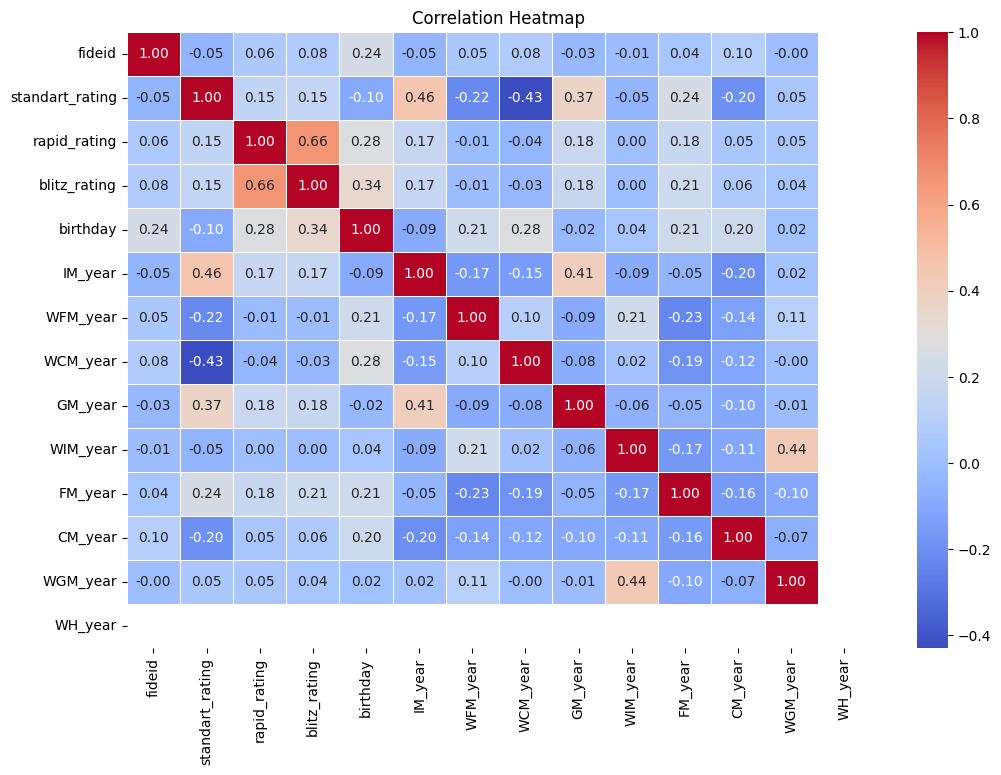

In [12]:
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# Dynamic correlation heatmap with Plotly
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
fig = px.imshow(numerical_df.corr(), text_auto=True, title="Dynamic Correlation Heatmap")
fig.show()

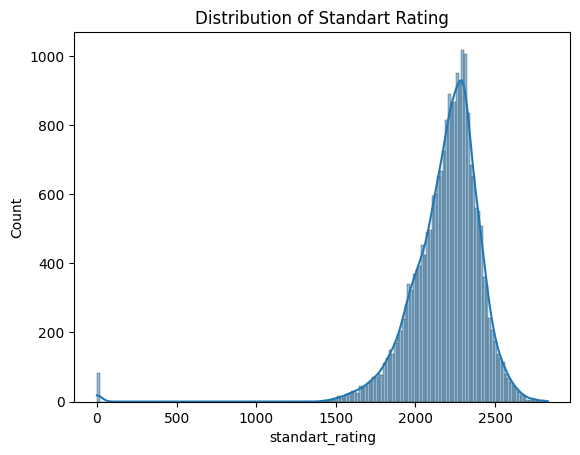

In [16]:
sns.histplot(df['standart_rating'], kde=True)
plt.title('Distribution of Standart Rating')
plt.show()

In [19]:
# Pie chart for Title distribution
title_counts = df['title'].value_counts()
fig = px.pie(names=title_counts.index, values=title_counts.values, title="Title Distribution of Players")
fig.show()

In [26]:
# Treemap for Title Distribution across Countries
fig = px.treemap(df, path=['country', 'title'], title="Title Distribution across Countries")
fig.show()


In [33]:
fig = px.scatter_3d(df, x='fideid', y='standart_rating', z='rapid_rating', color='title', title="3D Scatter Plot")
fig.show()

In [35]:
import plotly.graph_objects as go

# Create a 3D surface plot for the correlation matrix
correlation_matrix = numerical_df.corr()
fig = go.Figure(data=[go.Surface(z=correlation_matrix.values, x=correlation_matrix.columns, y=correlation_matrix.columns)])  # Use go.Surface
fig.update_layout(title="3D Correlation Heatmap")  # Set title using update_layout
fig.show()

In [36]:
# 3D Histogram for Standard Rating distribution
fig = px.histogram(df, x='standart_rating', nbins=30, title='3D Distribution of Standart Rating')
fig.update_traces(marker=dict(color='blue', opacity=0.8), opacity=0.8)
fig.update_layout(scene=dict(xaxis_title='Standart Rating', yaxis_title='Frequency'))
fig.show()

In [37]:
# 3D Effect for Pie Chart
fig = px.pie(names=title_counts.index, values=title_counts.values, title="3D Title Distribution of Players")
fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.show()